In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Overview of Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [289]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [290]:
print (train.shape)
print("==========")
train.info()

(17324, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17324 entries, 0 to 17323
Data columns (total 8 columns):
Id                17324 non-null int64
Province/State    7930 non-null object
Country/Region    17324 non-null object
Lat               17324 non-null float64
Long              17324 non-null float64
Date              17324 non-null object
ConfirmedCases    17324 non-null float64
Fatalities        17324 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


# now lets see what happend all around the world

In [291]:
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.date

conf_case = train.groupby('Date')['ConfirmedCases'].agg('sum')
death_rate = train.groupby('Date')['Fatalities'].agg('sum')

world = pd.concat([conf_case, death_rate], axis=1)
world.head()

,ConfirmedCases,Fatalities
Date,,
2020-01-22,539.0,17.0
2020-01-23,627.0,18.0
2020-01-24,901.0,25.0
2020-01-25,1347.0,41.0
2020-01-26,1959.0,53.0


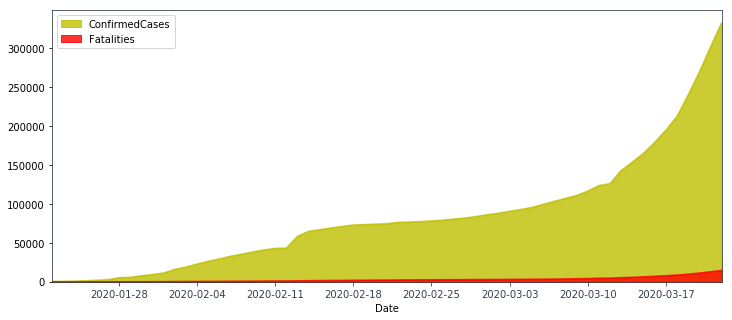

In [292]:
import matplotlib. pyplot as plt
from matplotlib import dates
ax = world['ConfirmedCases'].plot.area(alpha = 0.8 , legend = True , figsize = (12,5) , color ='y')
ax = world['Fatalities'].plot.area(alpha = 0.8 , legend = True , color ='r')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))

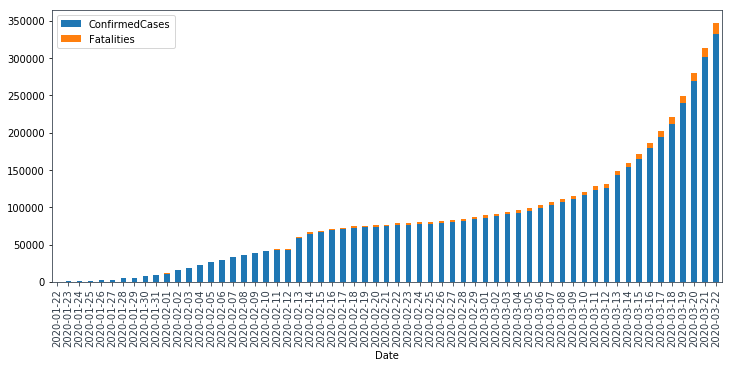

In [293]:
world.plot.bar(stacked = True , figsize = (12,5));

## In this chapter we will see the countries that have been affected most by the corona virus

In [294]:
confirmed_case_country =train.groupby('Country/Region')['ConfirmedCases'].agg('max').sort_values(ascending =False)[:20]
Fatalities_country = train.groupby('Country/Region')['Fatalities'].agg('max').sort_values(ascending =False)[:20]

countries = {'positive_Cases': confirmed_case_country }
countries = pd.DataFrame(countries)

countries_fatal = {'fatal_Cases':Fatalities_country}
countries_fatal = pd.DataFrame(countries_fatal)

In [295]:
countries_case_fatal = pd.concat([countries, countries_fatal], axis=1, sort=False)

In [296]:
countries_case_fatal.head()

,positive_Cases,fatal_Cases
China,67800.0,3144.0
Italy,59138.0,5476.0
Spain,28768.0,1772.0
Germany,24873.0,94.0
Iran,21638.0,1685.0


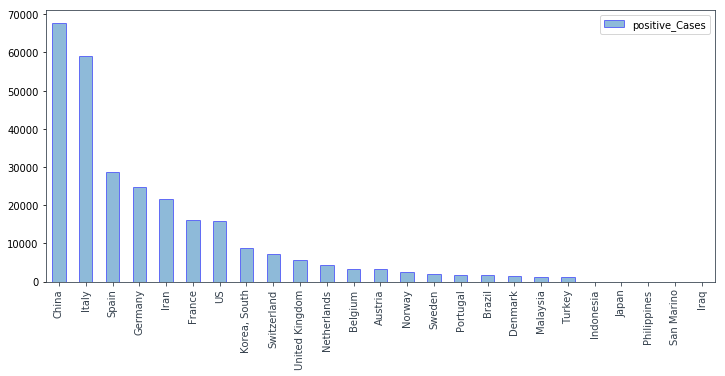

In [297]:
ax = countries_case_fatal['positive_Cases'].plot.bar(figsize=(12,5) , edgecolor ='blue' ,  alpha = 0.5 , legend = True);

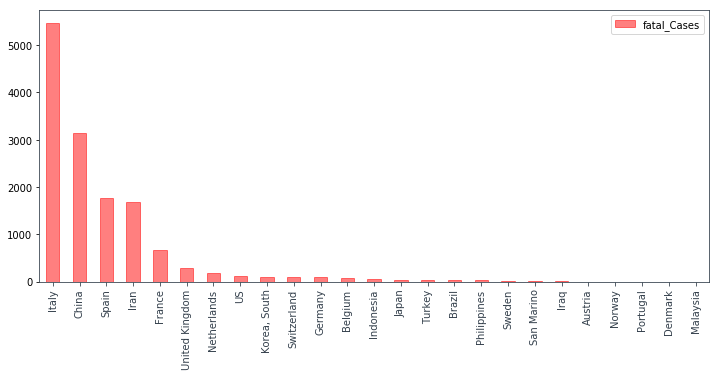

In [298]:
countries_case_fatal_copy = countries_case_fatal.sort_values(by=['fatal_Cases'] ,ascending =False).copy()
countries_case_fatal_copy['fatal_Cases'].plot.bar(figsize=(12,5) , color ='red' , edgecolor = 'red' ,  
                                                  alpha = 0.5 , legend = True);

## now we can make a comparison between four countries with high fatality rate

In [4]:
China = train.loc[train['Country/Region']=='China'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'Fatalities'], axis=1)
China.rename(columns={'ConfirmedCases':'ConfirmedCases_china'}, inplace=True)
Italy = train.loc[train['Country/Region']=='Italy'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'Fatalities'], axis=1)
Italy.rename(columns={'ConfirmedCases':'ConfirmedCases_Italy'}, inplace=True)
Spain = train.loc[train['Country/Region']=='Spain'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'Fatalities'], axis=1)
Spain.rename(columns={'ConfirmedCases':'ConfirmedCases_Spain'}, inplace=True)
Iran = train.loc[train['Country/Region']=='Iran'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'Fatalities'], axis=1)
Iran.rename(columns={'ConfirmedCases':'ConfirmedCases_Iran'}, inplace=True)

In [5]:
top_four = pd.concat([China, Italy , Spain , Iran], axis=1, sort=False)

In [6]:
top_four.tail()

,ConfirmedCases_china,ConfirmedCases_Italy,ConfirmedCases_Spain,ConfirmedCases_Iran
Date,,,,
2020-03-18,78810.0,35713.0,13910.0,17361.0
2020-03-19,78861.0,41035.0,17963.0,18407.0
2020-03-20,78946.0,47021.0,20410.0,19644.0
2020-03-21,78992.0,53578.0,25374.0,20610.0
2020-03-22,79070.0,59138.0,28768.0,21638.0


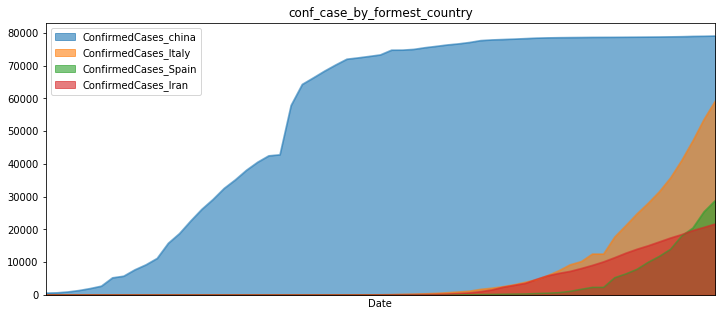

In [8]:
ax = top_four.plot.area(stacked = False , figsize = (12,5) , alpha = 0.6 , legend = True)
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))
ax.title.set_text('conf_case_by_formest_country')

In [9]:
China = train.loc[train['Country/Region']=='China'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'ConfirmedCases'], axis=1)
China.rename(columns={'Fatalities':'Fatalities_china'}, inplace=True)
Italy = train.loc[train['Country/Region']=='Italy'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'ConfirmedCases'], axis=1)
Italy.rename(columns={'Fatalities':'Fatalities_Italy'}, inplace=True)
Spain = train.loc[train['Country/Region']=='Spain'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'ConfirmedCases'], axis=1)
Spain.rename(columns={'Fatalities':'Fatalities_Spain'}, inplace=True)
Iran = train.loc[train['Country/Region']=='Iran'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long' , 'ConfirmedCases'], axis=1)
Iran.rename(columns={'Fatalities':'Fatalities_Iran'}, inplace=True)
top_four = pd.concat([China, Italy , Spain , Iran], axis=1, sort=False)

In [10]:
top_four.tail()

,Fatalities_china,Fatalities_Italy,Fatalities_Spain,Fatalities_Iran
Date,,,,
2020-03-18,3201.0,2978.0,623.0,1135.0
2020-03-19,3209.0,3405.0,830.0,1284.0
2020-03-20,3213.0,4032.0,1043.0,1433.0
2020-03-21,3219.0,4825.0,1375.0,1556.0
2020-03-22,3224.0,5476.0,1772.0,1685.0


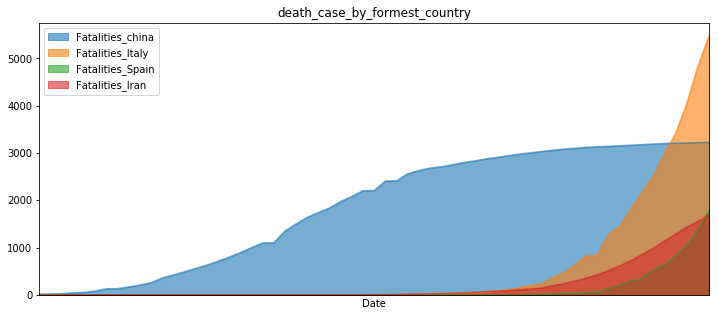

In [11]:
ax = top_four.plot.area(stacked = False , figsize = (12,5) , alpha = 0.6 , legend = True)
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))
ax.title.set_text('death_case_by_formest_country')

### Lets take a look at China and see how the dependent time series behave (since china passed the peak of the disease)

In [149]:
China = train.loc[train['Country/Region']=='China'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long'], axis=1)
China.tail()

,ConfirmedCases,Fatalities
Date,,
2020-03-18,78810.0,3201.0
2020-03-19,78861.0,3209.0
2020-03-20,78946.0,3213.0
2020-03-21,78992.0,3219.0
2020-03-22,79070.0,3224.0


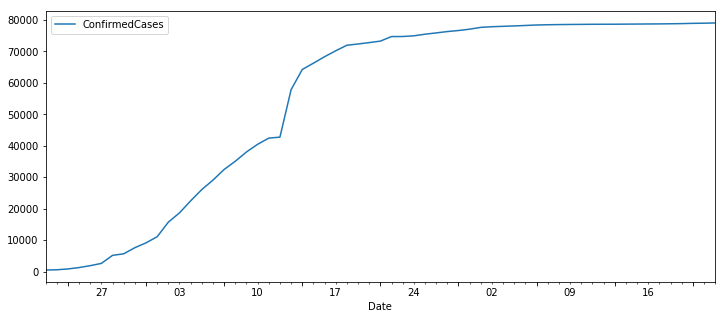

In [150]:
China.reset_index(inplace=True)
China['Date'] = pd.to_datetime(China['Date'])
China = China.set_index('Date')
China.index.freq ='D'
ax = China['ConfirmedCases'].plot(figsize = (12,5) , legend = True);
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

In [151]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    #print('%f Augmented Dickey-Fuller Test' %title)
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value(%s)' %key]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
adf_test(China['ConfirmedCases'])        

ADF test statistic     -2.254902
p-value                 0.186926
# lags used             1.000000
# observations         59.000000
critical value(10%)    -2.593652
critical value(5%)     -2.911939
critical value(1%)     -3.546395
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


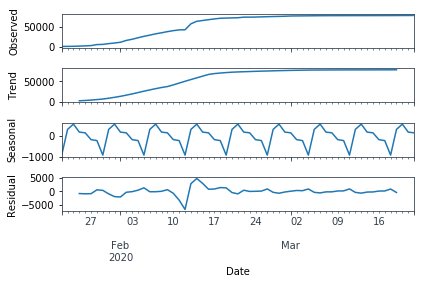

In [378]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(China['ConfirmedCases'])
results.plot();                    

### as we can see below , we have intresting seasonality in our time series behavior . This seasonality shows that confirmed cases reach the highest point on mondays at china 

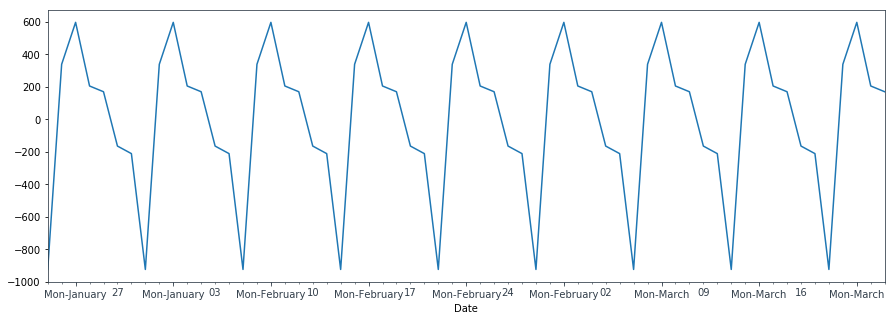

In [369]:
ax = results.seasonal.plot(figsize=(15,5));
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0));
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B"))

## now lets forcast what will happend in future for Iran with using LSTM

In [130]:
Iran = train.loc[train['Country/Region']=='Iran'].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long'], axis=1)
Iran.tail()

,ConfirmedCases,Fatalities
Date,,
2020-03-18,17361.0,1135.0
2020-03-19,18407.0,1284.0
2020-03-20,19644.0,1433.0
2020-03-21,20610.0,1556.0
2020-03-22,21638.0,1685.0


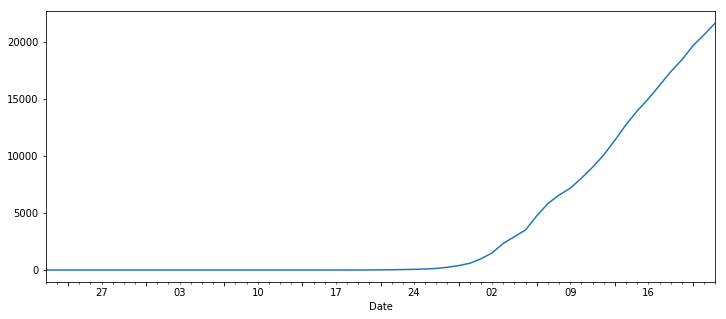

In [131]:
Iran.reset_index(inplace=True)
Iran['Date'] = pd.to_datetime(Iran['Date'])
Iran = Iran.set_index('Date')
Iran.index.freq ='D'
ax = Iran['ConfirmedCases'].plot(figsize = (12,5));
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

In [27]:
adf_test(Iran['ConfirmedCases'])  

ADF test statistic     -1.049828
p-value                 0.734660
# lags used             3.000000
# observations         57.000000
critical value(10%)    -2.594624
critical value(5%)     -2.913766
critical value(1%)     -3.550670
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


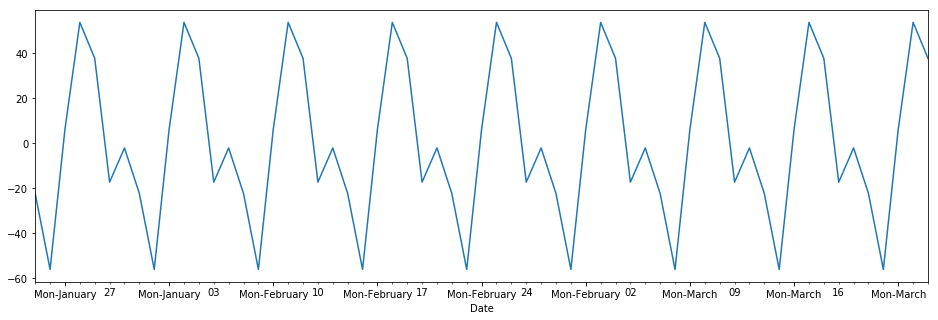

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(Iran['ConfirmedCases'])
ax = results.seasonal.plot(figsize = (16,5)); 
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0));
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B"))

### now lets build our LSTM model for forcasting

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Iran)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [133]:
scaled_Iran = scaler.transform(Iran)

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [134]:
n_input = 12
n_features = 2
generator = TimeseriesGenerator(scaled_Iran, scaled_Iran, length=n_input, batch_size=1)

In [135]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [136]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_285 (LSTM)              (None, 100)               41200     
_________________________________________________________________
dense_285 (Dense)            (None, 2)                 202       
Total params: 41,402
Trainable params: 41,402
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.fit_generator(generator,epochs=40)

Epoch 1/40
49/49 [==============================] - 73s 1s/step - loss: 0.0699
Epoch 2/40
49/49 [==============================] - 4s 82ms/step - loss: 0.0069
Epoch 3/40
49/49 [==============================] - 4s 80ms/step - loss: 0.0046
Epoch 4/40
49/49 [==============================] - 3s 71ms/step - loss: 0.0038
Epoch 5/40
49/49 [==============================] - 3s 70ms/step - loss: 0.0017
Epoch 6/40
49/49 [==============================] - 4s 72ms/step - loss: 0.0017
Epoch 7/40
49/49 [==============================] - 4s 74ms/step - loss: 0.0023
Epoch 8/40
49/49 [==============================] - 3s 71ms/step - loss: 0.0013
Epoch 9/40
49/49 [==============================] - 4s 73ms/step - loss: 8.4420e-04
Epoch 10/40
49/49 [==============================] - 4s 76ms/step - loss: 8.2198e-04
Epoch 11/40
49/49 [==============================] - 4s 81ms/step - loss: 5.1388e-04
Epoch 12/40
49/49 [==============================] - 4s 71ms/step - loss: 5.6137e-04
Epoch 13/40
49/49 [===

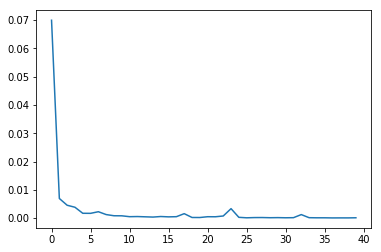

In [139]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [140]:
test_predictions = []

first_eval_batch = scaled_Iran[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(32):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [141]:
true_predictions = scaler.inverse_transform(test_predictions)
cols = ['ConfirmedCases-predict','Fatalities-predict']
idx = pd.date_range('2020-03-23' , periods = 32 , freq = "D" )
forc_iran = pd.DataFrame(true_predictions , index = idx , columns = cols)

In [142]:
forc_iran.head()

,ConfirmedCases-predict,Fatalities-predict
2020-03-23,21440.510813,1747.492538
2020-03-24,22067.272170,1872.856451
2020-03-25,22653.408470,1999.002944
2020-03-26,23177.194290,2124.270038
2020-03-27,23630.695239,2247.473820


#### as you can see below , the plot shows what will happe for Iran next 32 days

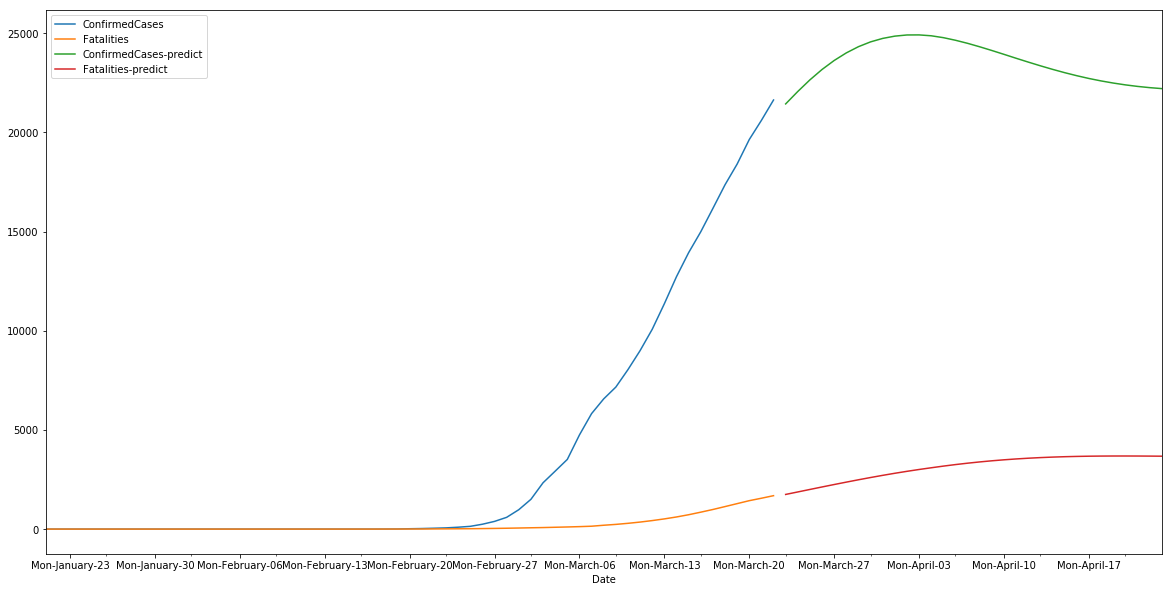

In [143]:
ax =Iran.plot(figsize = (20,10))

forc_iran.plot(ax=ax)
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0));
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

In [148]:
forc_iran = forc_iran.rename(columns={"ConfirmedCases-predict": "ConfirmedCases", "Fatalities-predict": "Fatalities"})
Q = Iran.append(forc_iran)
Q = Q.rename(columns={"ConfirmedCases": "ConfirmedCasesIran", "Fatalities": "FatalitiesIran"})
S = Q['2020-03-12':'2020-05-23']


### we develope The lstm model on each country separately and save the result into the csv file , just like Iran


In [146]:
for l in list_countries:
    print(l)
    Iran = train.loc[train['Country/Region']==l].groupby('Date').agg('sum').drop(['Id', 'Lat' , 'Long'], axis=1)
    
    Iran.reset_index(inplace=True)
    Iran['Date'] = pd.to_datetime(Iran['Date'])
    Iran = Iran.set_index('Date')
    Iran.index.freq ='D'
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(Iran)
    
    scaled_Iran = scaler.transform(Iran)
    
    n_input = 12
    n_features = 2
    generator = TimeseriesGenerator(scaled_Iran, scaled_Iran, length=n_input, batch_size=1)
    
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mse')
    
    model.fit_generator(generator,epochs=20)
    
    test_predictions = []

    first_eval_batch = scaled_Iran[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(32):
    
        current_pred = model.predict(current_batch)[0]
    
        test_predictions.append(current_pred) 
    
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
        
    true_predictions = scaler.inverse_transform(test_predictions)
    cols = ['ConfirmedCases','Fatalities']
    idx = pd.date_range('2020-03-23' , periods = 32 , freq = "D" )
    forc_iran = pd.DataFrame(true_predictions , index = idx , columns = cols) 
    
    Q = Iran.append(forc_iran)
    Q = Q.rename(columns={"ConfirmedCases": "ConfirmedCases%s"%l, "Fatalities": "Fatalities%s"%l})
    S1 = Q['2020-03-12':'2020-05-23']
    S = pd.concat([S, S1], axis=1)

Thailand
Epoch 1/20
49/49 [==============================] - 66s 1s/step - loss: 0.1064
Epoch 2/20
49/49 [==============================] - 4s 74ms/step - loss: 0.0479
Epoch 3/20
49/49 [==============================] - 4s 74ms/step - loss: 0.0416
Epoch 4/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0390
Epoch 5/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0358
Epoch 6/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0323
Epoch 7/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0304
Epoch 8/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0271
Epoch 9/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0253
Epoch 10/20
49/49 [==============================] - 4s 74ms/step - loss: 0.0291
Epoch 11/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0254
Epoch 12/20
49/49 [==============================] - 4s 75ms/step - loss: 0.0241
Epoch 13/20
49/49 [==========

49/49 [==============================] - 3s 70ms/step - loss: 0.0054
Epoch 20/20
49/49 [==============================] - 4s 72ms/step - loss: 0.0043
Tunisia
Epoch 1/20
49/49 [==============================] - 61s 1s/step - loss: 0.0393
Epoch 2/20
49/49 [==============================] - 3s 71ms/step - loss: 0.0261
Epoch 3/20
49/49 [==============================] - 3s 71ms/step - loss: 0.0118
Epoch 4/20
49/49 [==============================] - 3s 70ms/step - loss: 0.0059
Epoch 5/20
49/49 [==============================] - ETA: 0s - loss: 0.006 - 3s 70ms/step - loss: 0.0062
Epoch 6/20
49/49 [==============================] - 3s 70ms/step - loss: 0.0047
Epoch 7/20
49/49 [==============================] - 3s 70ms/step - loss: 0.0047
Epoch 8/20
49/49 [==============================] - 3s 70ms/step - loss: 0.0076
Epoch 9/20
49/49 [==============================] - 3s 70ms/step - loss: 0.0057
Epoch 10/20
49/49 [==============================] - 3s 71ms/step - loss: 0.0064
Epoch 11/20
49/49 

49/49 [==============================] - 4s 74ms/step - loss: 0.0102
Epoch 20/20
49/49 [==============================] - 4s 75ms/step - loss: 0.0114
United Kingdom
Epoch 1/20
49/49 [==============================] - 62s 1s/step - loss: 0.0516
Epoch 2/20
49/49 [==============================] - 4s 78ms/step - loss: 0.0312
Epoch 3/20
49/49 [==============================] - 4s 78ms/step - loss: 0.0126
Epoch 4/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0033
Epoch 5/20
49/49 [==============================] - 4s 78ms/step - loss: 0.0072
Epoch 6/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0039
Epoch 7/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0041
Epoch 8/20
49/49 [==============================] - 4s 78ms/step - loss: 0.0051
Epoch 9/20
49/49 [==============================] - 4s 78ms/step - loss: 0.0031
Epoch 10/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0029
Epoch 11/20
49/49 [================

49/49 [==============================] - 4s 77ms/step - loss: 9.0310e-04
Zambia
Epoch 1/20
49/49 [==============================] - 64s 1s/step - loss: 0.0267
Epoch 2/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0207
Epoch 3/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0178
Epoch 4/20
49/49 [==============================] - 4s 76ms/step - loss: 0.0168
Epoch 5/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0149
Epoch 6/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0114
Epoch 7/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0091
Epoch 8/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0081
Epoch 9/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0076
Epoch 10/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0069
Epoch 11/20
49/49 [==============================] - 4s 79ms/step - loss: 0.0067
Epoch 12/20
49/49 [====================